# Linear regression
# Komarist Katya, EK-61

In [12]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

import math
import re

import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np

from datetime import date, timedelta
import plotly.offline as ply
import plotly.graph_objs as go
from plotly.tools import make_subplots
import plotly.express as px

ply.init_notebook_mode(connected=True)

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


import plotly.graph_objects as go
%matplotlib inline

## Загрузка и ознакомление с данными (берется уже подготовленный датасет)

In [16]:
data = pd.read_csv("airbnb_prep.csv", header = 0, sep=';')

In [17]:
data.head()

,price,host_since,neighbourhood_cleansed,city,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,number_of_reviews,instant_bookable,calculated_host_listings_count,apartment,house,private_room,shared_room,strict_cancel,flexible_cancel,moderate_cancel
0,195.0,2632.0,1,1,4.0,1.0,1.0,1.0,1,0,...,2.0,1,21.770801,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,150.0,3201.0,1,1,2.0,1.5,1.0,1.0,1,14,...,2.0,1,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,140.0,4015.0,1,1,6.0,1.0,2.0,3.0,1,9,...,53.0,1,3.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,110.0,2745.0,1,1,3.0,1.0,0.0,2.0,1,12,...,32.0,1,4.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,119.0,3033.0,1,1,2.0,1.0,1.0,1.0,0,11,...,3.0,1,3.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3013 non-null   float64
 1   host_since                      3013 non-null   float64
 2   neighbourhood_cleansed          3013 non-null   int64  
 3   city                            3013 non-null   int64  
 4   accommodates                    3013 non-null   float64
 5   bathrooms                       3013 non-null   float64
 6   bedrooms                        3013 non-null   float64
 7   beds                            3013 non-null   float64
 8   bed_type                        3013 non-null   int64  
 9   amenities                       3013 non-null   int64  
 10  cleaning_fee                    3013 non-null   float64
 11  guests_included                 3013 non-null   float64
 12  minimum_nights                  30

In [19]:
data.describe()

,price,host_since,neighbourhood_cleansed,city,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,number_of_reviews,instant_bookable,calculated_host_listings_count,apartment,house,private_room,shared_room,strict_cancel,flexible_cancel,moderate_cancel
count,3013.000000,3013.000000,3013.00000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,...,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,144.455691,2623.953177,0.78991,0.974444,3.152015,1.234044,1.191200,1.613771,0.959177,13.365417,...,14.047844,0.895121,2.878892,0.615002,0.315300,0.319947,0.026884,0.324593,0.362761,0.295055
std,100.656553,594.440620,0.40744,0.157832,1.811690,0.500303,0.751843,0.978213,0.197913,3.847555,...,22.892149,0.306448,4.585348,0.486676,0.464713,0.466533,0.161770,0.468300,0.480877,0.456143
min,10.000000,1854.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,2157.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.000000,2520.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,14.000000,...,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,165.000000,2967.000000,1.00000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,16.000000,...,16.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,592.666575,4407.641024,1.00000,1.000000,9.294529,3.013747,3.734761,5.256614,1.000000,26.000000,...,105.760553,1.000000,21.770801,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
categorical = ['amenities',
 'bed_type',
 'private_room',
 'shared_room',
 'apartment',
 'house',
 'instant_bookable',
 'moderate_cancel',
 'flexible_cancel',
 'strict_cancel',
 'city',
 'neighbourhood_cleansed',
 'price']
numeral = ['bathrooms','bedrooms','beds','cleaning_fee','calculated_host_listings_count', 'guests_included'
          , 'maximum_nights', 'minimum_nights', 'price', 'host_since', 'accommodates', 'number_of_reviews']

In [20]:
df = data.copy()

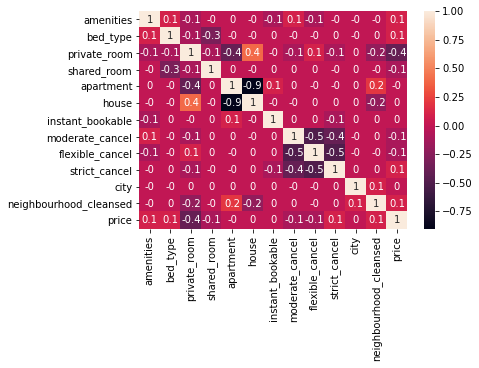

In [24]:
corrMatrix = round(df[categorical].corr(),1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

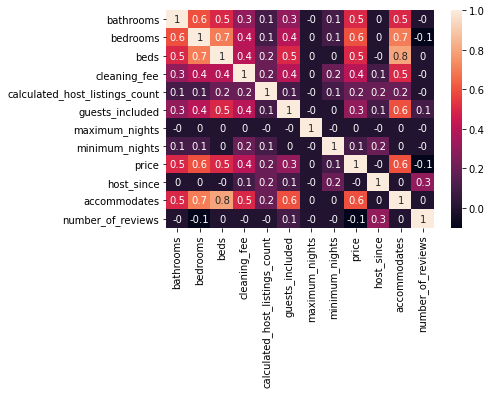

In [21]:
corrMatrix = round(df[numeral].corr(),1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Результативная переменная Price наиболее сильно коррелирует с переменными bathrooms, bedrooms, beds, cleaning_fee, accommodates, private room. С остальными переменными корреляция слабая (к-т корреляции менее 0,4)

Для построение однофакторной модели возьмем переменную accommodates, а затем bedrooms (поскольку они имею наивысшие к-ты корреляции).

In [70]:
# Создаиние тестовой и обучающей выборки
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [83]:
summary = pd.DataFrame()
summary['model'] = ['simle_linear_accomodates']

In [84]:
# Fitting Simple Linear Regression to the Training set (engine-size)
from sklearn.linear_model import LinearRegression
sr=LinearRegression().fit(X_train[:, 4:5], y_train)

In [85]:
# Getting parameters
sr.coef_, sr.intercept_

(array([102.27890569]), 17.50705670459962)

In [86]:
# Predicting the Test set results
y_pred=sr.predict(X_test[:,  4:5])

In [87]:
# Coefficient of determination R^2
sr.score(X_train[:, 4:5], y_train), sr.score(X_test[:, 4:5], y_test)
summary['R2_train'] = [round(sr.score(X_train[:, 4:5], y_train),3)]
summary['R2_test'] = [round(sr.score(X_test[:, 4:5], y_test),3)]
summary

,model,R2_train,R2_test
0,simle_linear_accomodates,0.255,0.247


In [88]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
summary['MSE_train'] = [round(mean_squared_error(y_train, sr.predict(X_train[:, 4:5])),2)]
summary['MSE_test'] = [round(mean_squared_error(y_test, y_pred),2)]
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67


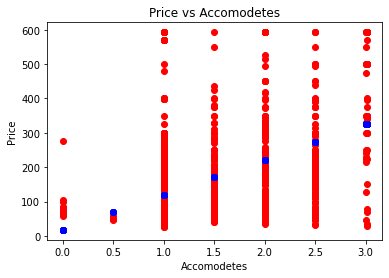

In [89]:
# Visualising the Training set results
plt.scatter(X_train[:, 4], y_train, color='red')
plt.plot(X_train[:, 4], sr.predict(X_train[:, 4:5]), 'bo')
plt.title('Price vs Accomodetes')
plt.xlabel('Accomodetes')
plt.ylabel('Price')
plt.show()

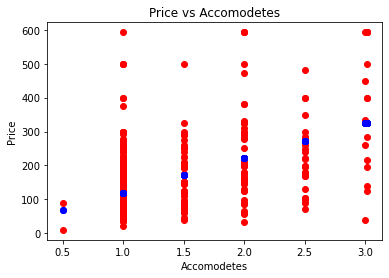

In [90]:
# Visualising the Test set results
plt.scatter(X_test[:, 4], y_test, color='red')
plt.plot(X_test[:, 4], sr.predict(X_test[:, 4:5]), 'bo')
plt.title('Price vs Accomodetes')
plt.xlabel('Accomodetes')
plt.ylabel('Price')
plt.show()

Модель низкого качества. Коеффициент детерминации очень мал (0.25 на обучающей и 0.24 на тестовой выборке). 

Построим однофакторную модель с фактором bedrooms.

In [91]:
# Fitting Simple Linear Regression to the Training set (engine-size)
from sklearn.linear_model import LinearRegression
sr=LinearRegression().fit(X_train[:, 6:7], y_train)

In [92]:
# Getting parameters
sr.coef_, sr.intercept_

(array([54.77196747]), 56.77927711862388)

In [93]:
# Predicting the Test set results
y_pred=sr.predict(X_test[:,  6:7])

In [94]:
# Coefficient of determination R^2
sr.score(X_train[:, 6:7], y_train), sr.score(X_test[:, 6:7], y_test)

(0.25949968398687506, 0.3254136890026309)

In [95]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 6:7])), mean_squared_error(y_test, y_pred)

(7545.870833560647, 6651.374520039004)

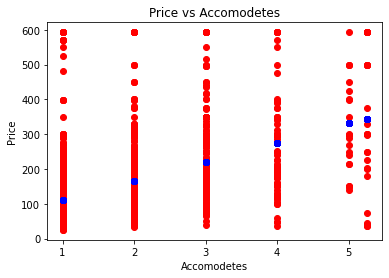

In [96]:
# Visualising the Training set results
plt.scatter(X_train[:, 6], y_train, color='red')
plt.plot(X_train[:, 6], sr.predict(X_train[:, 6:7]), 'bo')
plt.title('Price vs Accomodetes')
plt.xlabel('Accomodetes')
plt.ylabel('Price')
plt.show()

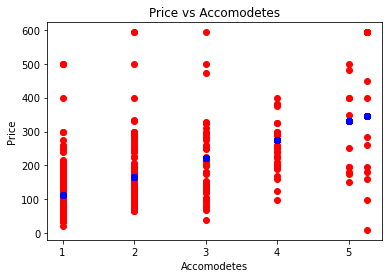

In [97]:
# Visualising the Test set results
plt.scatter(X_test[:, 6], y_test, color='red')
plt.plot(X_test[:, 6], sr.predict(X_test[:, 6:7]), 'bo')
plt.title('Price vs Accomodetes')
plt.xlabel('Accomodetes')
plt.ylabel('Price')
plt.show()

In [98]:
summary = summary.append({'model':'simple_linear_bedrooms',
                         'R2_train':round(sr.score(X_train[:, 6:7], y_train),3),
                         'R2_test':round( sr.score(X_test[:, 6:7], y_test),3),
                         'MSE_train':round(mean_squared_error(y_train, sr.predict(X_train[:, 6:7])),2),
                         'MSE_test': round(mean_squared_error(y_test, y_pred),2)}, ignore_index=True) 

In [99]:
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37


Однофакторная модель с фактором bedrooms показывает лучшие результаты.

Построим многофакторную модель и оценим p-значения для каждого фактора.

In [127]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr=LinearRegression().fit(X_train, y_train)

In [128]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-1.69999586e-02,  1.33525330e+01,  8.80076649e+00,  1.11645885e+01,
         4.13080186e+01,  3.65390654e+01, -5.23337837e+00,  1.61100140e+00,
         8.49404800e-01,  1.56021267e-01, -1.33861943e+00, -1.80567567e+00,
        -9.39800008e-06, -1.53711363e-01,  9.63377111e+00,  3.06256240e+00,
         2.59607765e+00, -1.02753940e+00, -4.30229239e+01, -6.14234743e+01,
        -1.05490305e+02, -9.92988372e+01, -1.10417645e+02]),
 138.6815783866153)

In [129]:
# Predicting the Test set results
y_pred=mr.predict(X_test)

In [130]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.5133629547227267, 0.26037550855093283)

In [132]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(4958.944928286597, 7292.646495520596)

In [131]:
# p-values
import statsmodels.api as sm
X_const=sm.add_constant(X_train)
mr1=sm.OLS(y_train, X_const).fit()
mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:36:08   Log-Likelihood:                -13673.
No. Observations:                2410   AIC:                         2.739e+04
Df Residuals:                    2386   BIC:                         2.753e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.6816     22.522      6.158      0.000      94.517     182.846
x1            -0.0170      0.003     -5.995      0.000      -0.023      -0.011
x2            13.3525      3.651      3.657      0.000       6.193      20.512
x3             8.8008      8.911      0.988      0.323      -8.673      26.274
x4            11.1646      1.694      6.591      0.000       7.843      14.486
x5            41.3080      3.934     10.499      0.000      33.593      49.023
x6            36.5391      3.256     11.223      0.000      30.155      42.923
x7            -5.2334      2.905     -1.801      0.072     -10.930       0.464
x8             1.6110      7.431      0.217      0.828     -12.960      16.182
x9             0.8494      0.392      2.165      0.030       0.080       1.619
x10            0.1560      0.044      3.570      0.000       0.070       0.242
x11           -1.3386      1.613     -0.830      0.407      -4.502       1.825
x12           -1.8057      0.837     -2.156      0.031      -3.448      -0.164
x13        -9.398e-06   7.15e-06     -1.315      0.189   -2.34e-05    4.62e-06
x14           -0.1537      0.071     -2.150      0.032      -0.294      -0.014
x15            9.6338      4.774      2.018      0.044       0.272      18.995
x16            3.0626      0.350      8.759      0.000       2.377       3.748
x17            2.5961      6.103      0.425      0.671      -9.372      14.565
x18           -1.0275      6.226     -0.165      0.869     -13.236      11.181
x19          -43.0229      4.249    -10.125      0.000     -51.355     -34.690
x20          -61.4235      9.089     -6.758      0.000     -79.247     -43.600
x21         -105.4903     12.447     -8.475      0.000    -129.898     -81.083
x22          -99.2988     12.645     -7.853      0.000    -124.096     -74.502
x23         -110.4176     12.539     -8.806      0.000    -135.005     -85.830
==============================================================================
Omnibus:                     1388.035   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16621.161
Skew:                           2.504   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                     4.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
x_names = pd.DataFrame()
x_names['number'] = list(range(1,len(df.iloc[:,1:].columns)+1))
x_names['name'] =df.iloc[:,1:].columns

In [124]:
x_names

,number,name
0,1,host_since
1,2,neighbourhood_cleansed
2,3,city
3,4,accommodates
4,5,bathrooms
5,6,bedrooms
6,7,beds
7,8,bed_type
8,9,amenities
9,10,cleaning_fee


In [125]:
exclude = ['city','bed_type','guests_included','maximum_nights','apartment','house']

In [136]:
summary = summary.append({'model':'multiple_linear_all',
                         'R2_train':round(mr.score(X_train, y_train),3),
                         'R2_test':round( mr.score(X_test, y_test),3),
                         'MSE_train':round(mean_squared_error(y_train, mr.predict(X_train)),2),
                         'MSE_test': round(mean_squared_error(y_test, y_pred),2)}, ignore_index=True)
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear_all,0.513,0.260,4958.94,7292.65


R2_train у многофакторной модели регрессии самый высокий, однако R2_test значительно меньше, что свидетельствует о том. что модель переучена. Также, судя по р-значениям, некоторые факторы являются не значимыми. А именно: 'city','bed_type','guests_included','maximum_nights','apartment','house'. Они будут исключены. 

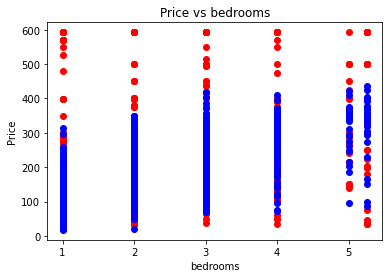

In [138]:
# Visualising the Training set results
plt.scatter(X_train[:, 6], y_train, color='red')
plt.plot(X_train[:, 6], mr.predict(X_train), 'bo')
plt.title('Price vs bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

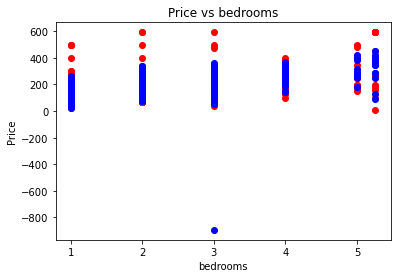

In [141]:
# Visualising the Training set results
plt.scatter(X_test[:, 6], y_test, color='red')
plt.plot(X_test[:, 6], mr.predict(X_test), 'bo')
plt.title('Price vs bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

In [145]:
# Создаиние тестовой и обучающей выборки
X1 = df.iloc[:,[1,2,4,5,6,7,9,10,12,14,15,16,19,20,21,22,23]].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=3)

In [146]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr=LinearRegression().fit(X_train1, y_train)

In [147]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-1.70463731e-02,  1.40417277e+01,  1.07590838e+01,  4.07082623e+01,
         3.60584962e+01, -5.41126266e+00,  8.74923459e-01,  1.43182926e-01,
        -1.80023878e+00, -1.65991700e-01,  1.03737703e+01,  3.09046022e+00,
        -4.48756954e+01, -6.19147168e+01, -1.07183454e+02, -1.01258988e+02,
        -1.12221017e+02]),
 152.29645916690578)

In [148]:
# Predicting the Test set results
y_pred=mr.predict(X_test1)

In [149]:
# Coefficient of determination R^2
mr.score(X_train1, y_train), mr.score(X_test1, y_test)

(0.5125089831594785, 0.48818390290715885)

In [150]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train1)), mean_squared_error(y_test, y_pred)

(4967.647097580055, 5046.4714324189845)

In [153]:
# p-values
import statsmodels.api as sm
X_const=sm.add_constant(X_train1)
mr1=sm.OLS(y_train, X_const).fit()
mr1.pvalues
#mr1.summary()

array([1.89955720e-16, 1.88470402e-09, 1.00157077e-04, 9.78847408e-11,
       2.31344304e-25, 1.77605365e-28, 5.99275191e-02, 2.51722758e-02,
       7.94589008e-04, 3.09936551e-02, 1.89135527e-02, 2.89398980e-02,
       1.38533175e-18, 1.31186039e-31, 1.03124968e-12, 8.31721157e-18,
       1.23524431e-15, 4.33904613e-19])

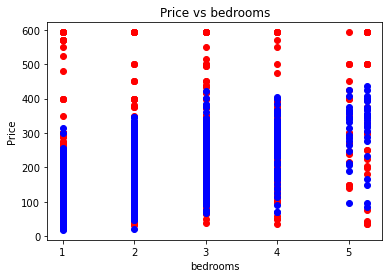

In [160]:
# Visualising the Training set results
plt.scatter(X_train1[:, 5], y_train, color='red')
plt.plot(X_train1[:, 5], mr.predict(X_train1), 'bo')
plt.title('Price vs bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

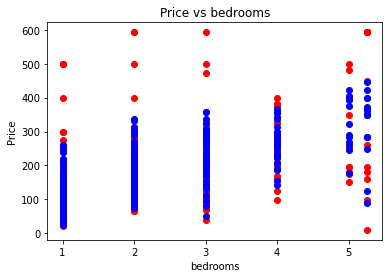

In [161]:
# Visualising the Training set results
plt.scatter(X_test1[:, 5], y_test, color='red')
plt.plot(X_test1[:, 5], mr.predict(X_test1), 'bo')
plt.title('Price vs bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

In [157]:
summary = summary.append({'model':'multiple_linear2',
                         'R2_train':round(mr.score(X_train1, y_train),3),
                         'R2_test':round( mr.score(X_test1, y_test),3),
                         'MSE_train':round(mean_squared_error(y_train, mr.predict(X_train1)),2),
                         'MSE_test': round(mean_squared_error(y_test, y_pred),2)}, ignore_index=True)


In [158]:
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
5,multiple_linear2,0.513,0.488,4967.65,5046.47


Качество модели учучшилось. Показатели R2_test стал выше, а MSE_test ниже.
Последняя построенная модель является наилучшей из всех регрессионных моделей. 

In [169]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p=PolynomialFeatures().fit_transform(X_train[:,6:7])
X_test_p=PolynomialFeatures().fit_transform(X_test[:,6:7])
pr=LinearRegression().fit(X_train_p[:, 1:], y_train)

In [170]:
# Getting parameters
pr.coef_, pr.intercept_

(array([55.30769855, -0.1088316 ]), 56.30007122399161)

In [172]:
# Predicting the Test set results
y_pred=pr.predict(X_test_p[:, 1:])

In [173]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:, 1:], y_test)

(0.2595013831023041, 0.3253163075968487)

In [174]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:, 1:])), mean_squared_error(y_test, y_pred)

(7545.853519178355, 6652.334693986481)

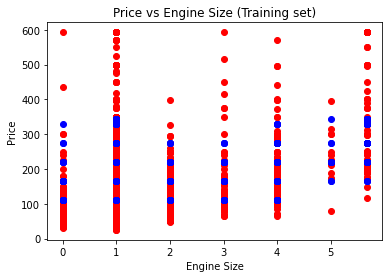

In [175]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

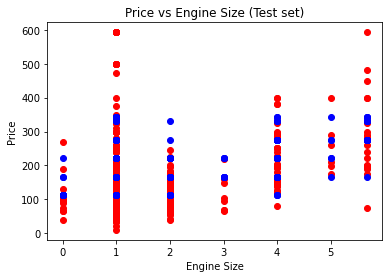

In [176]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], pr.predict(X_test_p[:, 1:]), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [188]:
summary = summary.append({'model':'polynomial_regression',
                         'R2_train':round(pr.score(X_train_p[:,1:], y_train),3),
                         'R2_test':round(pr.score(X_test_p[:, 1:], y_test),3),
                         'MSE_train':round(mean_squared_error(y_train, pr.predict(X_train_p[:, 1:])),2),
                         'MSE_test': round(mean_squared_error(y_test, y_pred),2)}, ignore_index=True)

In [189]:
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear2,0.513,0.488,4967.65,5046.47
4,polynomial_regression,0.260,0.325,7545.85,6652.33


Качество модели полиномиальной регрессии низкое. R2 как у модели на тестовой, так и на обучающей выборке низкий. 
### Выводы
Были построены однофакторные, многофакторные с использованием всех переменных и многофакторная с использоанием только значимых переменных, а также полиномиальная модель регрессии. Качество моделей оценивалось и сравнивалось на основании значений 	R2 и MSE.

Качество многофакторной модели со значимыми факторами наилучшее среди регрессионных моделей. Однако то, что R2_test меньше чем R2_train свидетельствует о переучености модели.

In [190]:
summary.to_csv('summary.csv')